# importing dependencies

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection

In [38]:
#loading tht data from csv files to pandas dataframe.

car_dataset=pd.read_csv('C:/projects/MLproject/project7/CAR DETAILS FROM CAR DEKHO.csv')

In [39]:
#Inserting first five rows and columns.

car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [40]:
#Checking the noof.rows and columns.

car_dataset.shape

(4340, 8)

In [41]:
#Getting some information about cars dataset.
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [42]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [43]:
#Checking the distribution of categorical data.


print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())



Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


# Encoding the categorical data.

In [44]:
#Encoding Fule column.

car_dataset.replace({'fuel':{'Petrol':3,'Diesel':4,'LPG':1,'CNG':2,'Electric':0}},inplace=True)

In [45]:
#Encoding seller_type column.

car_dataset.replace({'seller_type':{'Dealer':1,'Individual':2,'Trustmark Dealer':0}},inplace=True)

In [46]:
#Encoding transmission column.

car_dataset.replace({'transmission':{'Manual':1,'Automatic':0}},inplace=True)

In [47]:
#Encoding Owners column.

car_dataset.replace({'owner':{'Test Drive Car':4,'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)

In [48]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,3,2,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,3,2,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,4,2,1,0
3,Datsun RediGO T Option,2017,250000,46000,3,2,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,4,2,1,1


# Spliting train_test data

In [49]:
X=car_dataset.drop(['name','selling_price'],axis=1)
Y=car_dataset['selling_price']

In [51]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     3            2             1      0
1     2007      50000     3            2             1      0
2     2012     100000     4            2             1      0
3     2017      46000     3            2             1      0
4     2014     141000     4            2             1      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     4            2             1      1
4336  2014      80000     4            2             1      1
4337  2009      83000     3            2             1      1
4338  2016      90000     4            2             1      0
4339  2016      40000     3            2             1      0

[4340 rows x 6 columns]


In [52]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


# Spliting Train Test data

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model train

# Linear Regression

In [55]:
#loading Linear Regression

lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [56]:
#predection of training data

training_data_prediction=lin_reg_model.predict(X_train)

In [57]:
#R square error

error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.4430787587921934


# Visualize the actual price and predicted price

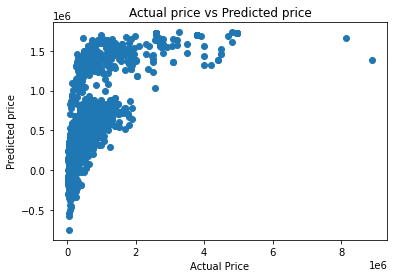

In [69]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [70]:
#predection of test data

test_data_prediction=lin_reg_model.predict(X_test)

In [71]:
#R square error

error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.5212912933220185


# Visualize the actual price and predicted price

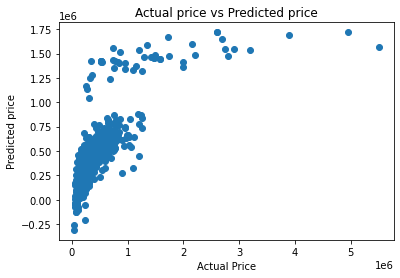

In [72]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

# Lasso Regression

In [73]:
#loading Linear Regression

lass_reg_model=Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [74]:
#predection of training data

training_data_prediction=lass_reg_model.predict(X_train)

In [75]:
#R square error

error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.4430787587404139


# Visualize the actual price and predicted price


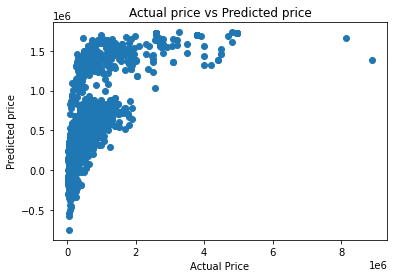

In [76]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [77]:
#predection of test data

test_data_prediction=lass_reg_model.predict(X_test)

In [78]:
#R square error

error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.5212906062492382


# Visualize the actual price and predicted price


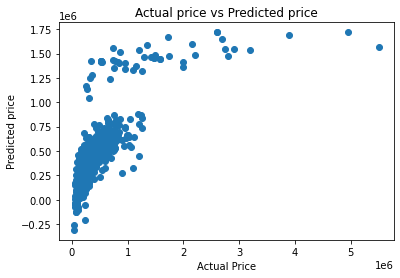

In [79]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()